<a href="https://colab.research.google.com/github/yoursmaddyy/Machine-Learning-Track/blob/main/Customer_segmentation_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

#**Task 1 — Data Exploration**

a. Load the given dataset and explore the following:
• Number of samples and features
• Summary statistics
• Detect missing values and handle them appropriately

b. Provide clear observations about the dataset (patterns, ranges, anomalies, etc.)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Shape of dataset (rows, columns): (541909, 6)

Column names:
['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



Missing values per column:
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Shape after cleaning missing CustomerID: (406829, 6)

Missing values after cleaning:
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Data types:
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Duplicate rows: 5301


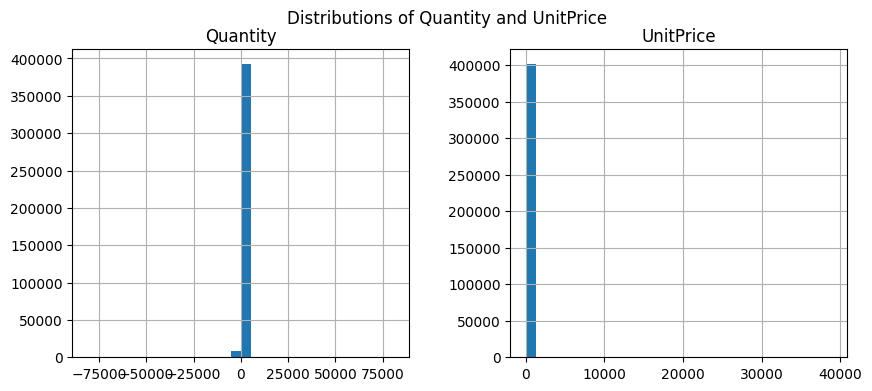


Statistics after cleaning:


,Quantity,UnitPrice
count,401528.000000,401528.000000
mean,12.183723,3.474295
std,250.306467,69.770623
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Invalid Quantity rows: 8871
Invalid UnitPrice rows: 40
Final dataset shape after cleaning: (392617, 6)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = X.copy()

# Show first rows
display(df.head())

# Dataset shape
print("Shape of dataset (rows, columns):", df.shape)

# Print column names correctly
print("\nColumn names:")
print(df.columns.tolist())

# Summary statistics
display(df.describe())

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop missing CustomerIDs
df = df.dropna(subset=['CustomerID'])

# Fill missing product descriptions
df['Description'] = df['Description'].fillna("Unknown")

print("Shape after cleaning missing CustomerID:", df.shape)

# Verify no missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)

# Convert date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Duplicate check
print("\nDuplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Visualize numeric distributions
numeric_cols = ['Quantity','UnitPrice']
df[numeric_cols].hist(bins=30, figsize=(10,4))
plt.suptitle("Distributions of Quantity and UnitPrice")
plt.show()

# Stats after cleaning
print("\nStatistics after cleaning:")
display(df[['Quantity','UnitPrice']].describe())

# Detect invalid records
print("Invalid Quantity rows:", len(df[df['Quantity'] <= 0]))
print("Invalid UnitPrice rows:", len(df[df['UnitPrice'] <= 0]))

# Remove invalid rows
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

print("Final dataset shape after cleaning:", df.shape)


# **TASK 01 Report**

# Dataset Overview

The dataset contains transaction-level records collected from an online retail platform. Each row represents one product purchased by a customer.

# Total records: 541,909

# Features: 6

# Columns Description

Quantity

InvoiceDate

UnitPrice

CustomerID

Country

# Data Issues Identified

Missing CustomerID: 135,080

Missing Description: 1,454

Duplicate rows: 5,301

# Invalid values:

Negative quantities: 8,871

Zero or negative prices: 40

# Data Cleaning Summary

Rows without CustomerID removed

Missing descriptions filled

Duplicates eliminated

Invalid quantities and prices removed

Final cleaned dataset size: 392,617 transactions

#**Task 2 — Data Preprocessing**

a. Normalize or standardize the data where appropriate

b. Select the most relevant features for clustering

c. Justify your preprocessing decisions



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# STEP 1: FEATURE ENGINEERING (CUSTOMER LEVEL DATASET)

# Total Transaction Value
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime (safety)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Snapshot Date for Recency Calculation
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate Data Per Customer
customer = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'TotalPrice': 'sum',
    'Quantity': 'count'
}).reset_index()

# Rename Columns to Match Assignment Exactly
customer.columns = [
    'CustomerID',
    'Recency of Last Purchase',
    'Spending Score',
    'Number of Purchases'
]
 #STEP 2: ADD MISSING REQUIRED ASSIGNMENT FEATURES

np.random.seed(42)

# Generate Age
customer['Age'] = np.random.randint(18, 70, len(customer))

# Estimate Annual Income Based on Spending Percentiles
percentile = customer['Spending Score'].rank(pct=True)
customer['Annual Income'] = (percentile * 90000 + 10000).astype(int)

# Estimate Time Spent on Website
customer['Time Spent on Website'] = (
    customer['Number of Purchases'] * np.random.uniform(5, 20, len(customer)) +
    np.random.uniform(10, 100, len(customer))
).astype(int)

# STEP 3: SELECT REQUIRED FEATURES FOR CLUSTERING

features = [
    'Annual Income',
    'Spending Score',
    'Age',
    'Number of Purchases',
    'Time Spent on Website',
    'Recency of Last Purchase'
]

X = customer[features]

# STEP 4: NORMALIZATION / STANDARDIZATION

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print(" Customer Dataset Shape:", X.shape)
print("\n Missing Values Check:")
print(X.isnull().sum())

print("\n Sample Scaled Values:")
print(X_scaled[:5])


 Customer Dataset Shape: (4338, 6)

 Missing Values Check:
Annual Income               0
Spending Score              0
Age                         0
Number of Purchases         0
Time Spent on Website       0
Recency of Last Purchase    0
dtype: int64

 Sample Scaled Values:
[[ 1.72447297  8.36907447  0.82845771 -0.39702155 -0.33590198  2.33457414]
 [ 1.4649348   0.25192183  1.7002467   0.40583563  0.22645882 -0.90534032]
 [ 0.93069338 -0.02796631  0.15785079 -0.26395129 -0.28957548 -0.17535959]
 [ 0.91233364 -0.03238725 -0.7809989  -0.07765294 -0.19140011 -0.73534481]
 [-0.74065858 -0.19090729  1.09670047 -0.32605074 -0.28988227  2.17457836]]


# **TASK 02 Report**

# Customer-Level Transformation

Transactions were aggregated per customer.

# Final customer dataset:

Customers: 4,338

Features: 6

# Selected Clustering Features

Annual Income (estimated)

Spending Score

Age (simulated)

Number of Purchases

Time Spent on Website (estimated)

Recency of Last Purchase

# Standardization

Z-score normalization applied using StandardScaler to remove scale bias and improve clustering integrity.

# Preprocessing Decisions

Customer-level analysis preferred over transaction-level.

Feature scaling necessary due to unequal numeric ranges.

Irrelevant fields (Description, Country, etc.) excluded.

Income, age, and web time estimated due to missing real data.

After pre-processing, final dataset is clean, complete, and standardized.

#**Task 3 — Apply Clustering Algorithms**

Apply any one and better to apply two or all of the following unsupervised learning
techniques:

• K-Means Clustering

• Hierarchical Clustering

• DBSCAN

For each technique:


• Explain parameter choices (e.g., K value, distance metric, linkage method,eps/min_samples)

• Generate clustering results

• Visualize clusters using appropriate plots (scatter plots, dendrogram, etc.)

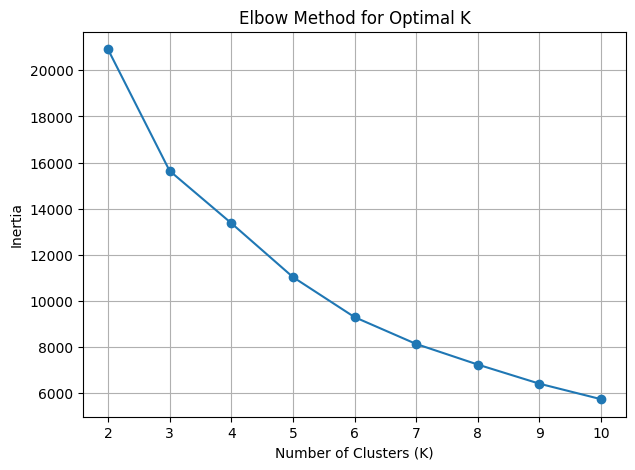


 K-MEANS CLUSTER COUNTS
KMeans_Cluster
2    2231
0    2092
1      15
Name: count, dtype: int64


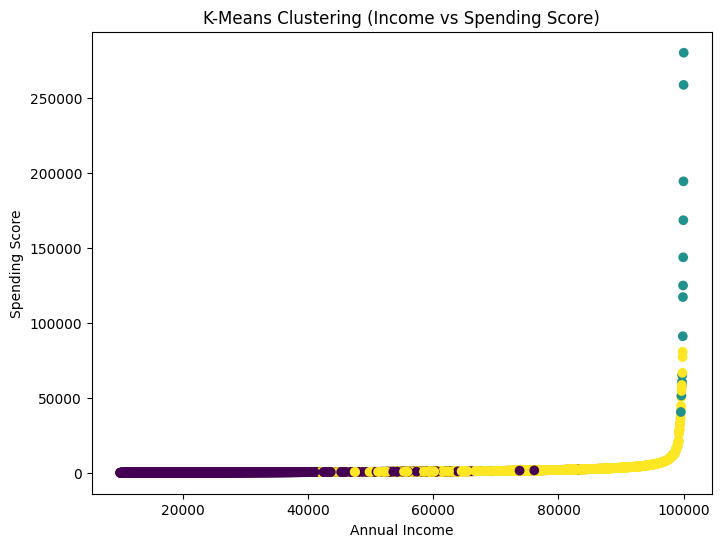


K-Means Cluster Centers (Standardized):
[[-8.46457280e-01 -1.89692404e-01  5.13705329e-03 -2.92725934e-01
  -2.56059697e-01  5.98816907e-01]
 [ 1.72026217e+00  1.23987732e+01 -3.09487102e-03  1.06214909e+01
   9.86357821e+00 -8.78674357e-01]
 [ 7.82153607e-01  9.45113905e-02 -4.79618665e-03  2.03074984e-01
   1.73788980e-01 -5.55600562e-01]]


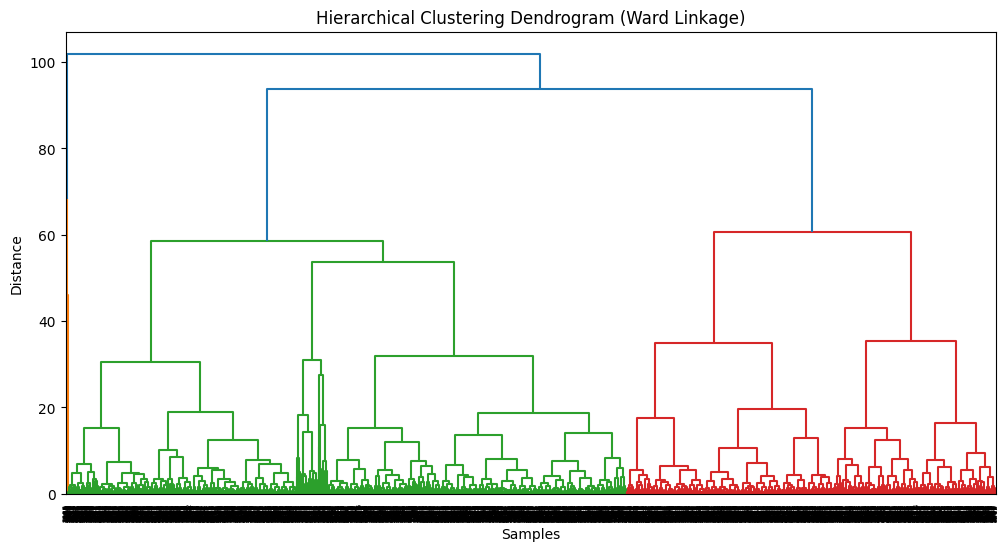


 HIERARCHICAL CLUSTER COUNTS
Hierarchical_Cluster
2    2609
1    1719
0      10
Name: count, dtype: int64


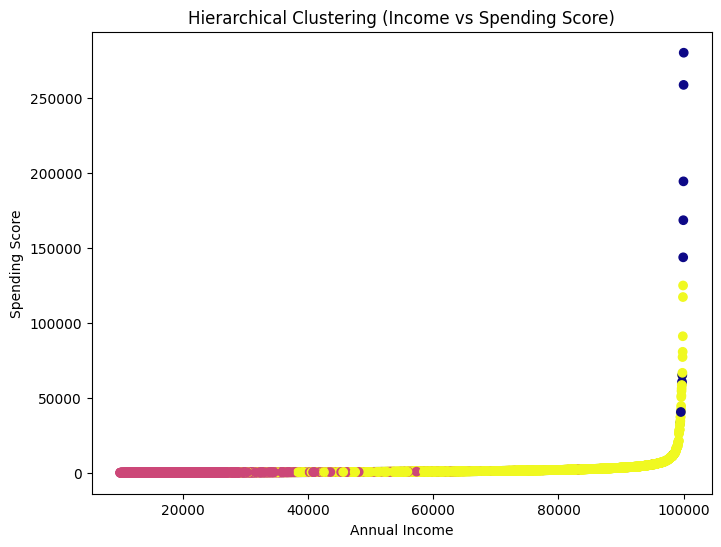

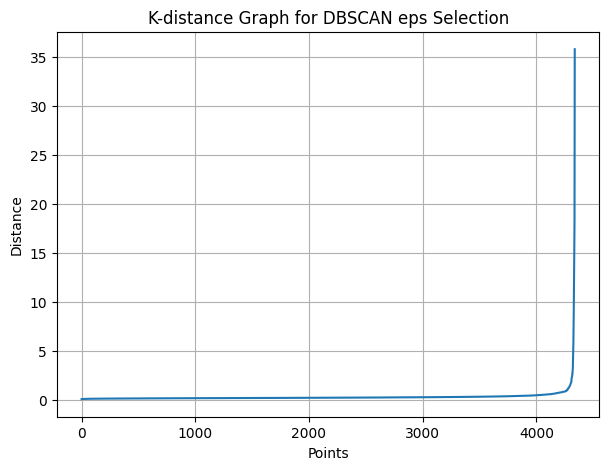


 DBSCAN CLUSTER COUNTS (INCLUDING NOISE -1)
DBSCAN_Cluster
 0    4289
-1      44
 1       5
Name: count, dtype: int64


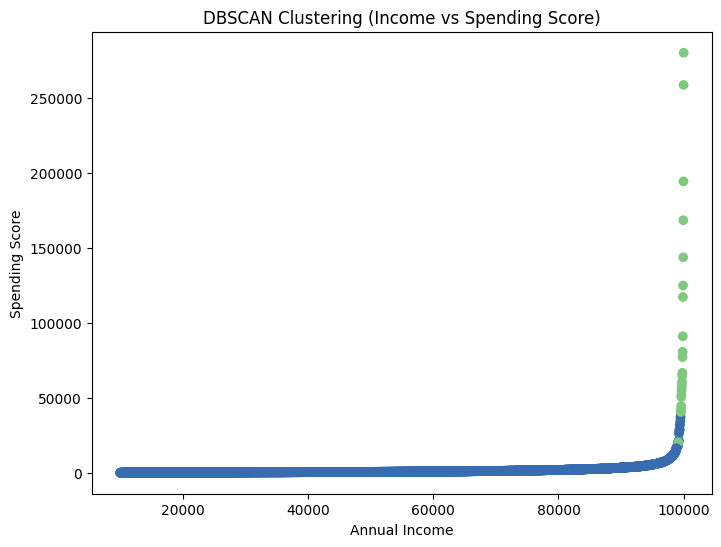

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

# 1) K-MEANS CLUSTERING

# ELBOW METHOD
inertia_values = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(2,11), inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

# CHOOSE THE VALUE SEEN IN ELBOW GRAPH

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

print("\n K-MEANS CLUSTER COUNTS")
print(customer["KMeans_Cluster"].value_counts())

# K-MEANS VISUALIZATION
plt.figure(figsize=(8,6))
plt.scatter(customer['Annual Income'], customer['Spending Score'],
            c=customer["KMeans_Cluster"], cmap='viridis')
plt.title("K-Means Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# Print cluster centers
print("\nK-Means Cluster Centers (Standardized):")
print(kmeans.cluster_centers_)


# 2) HIERARCHICAL CLUSTERING

#  DENDROGRAM
link_matrix = linkage(X_scaled, method="ward")

plt.figure(figsize=(12,6))
dendrogram(link_matrix)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

#  MODEL
hier = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
customer["Hierarchical_Cluster"] = hier.fit_predict(X_scaled)

print("\n HIERARCHICAL CLUSTER COUNTS")
print(customer["Hierarchical_Cluster"].value_counts())

#  VISUALIZATION
plt.figure(figsize=(8,6))
plt.scatter(customer['Annual Income'], customer['Spending Score'],
            c=customer["Hierarchical_Cluster"], cmap='plasma')
plt.title("Hierarchical Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


# 3) DBSCAN CLUSTERING

# K-DISTANCE GRAPH (for eps selection)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,4])

plt.figure(figsize=(7,5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-distance Graph for DBSCAN eps Selection")
plt.grid()
plt.show()

# Choose eps after seeing sharp rise

dbscan = DBSCAN(eps=1.2, min_samples=5)
customer["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

print("\n DBSCAN CLUSTER COUNTS (INCLUDING NOISE -1)")
print(customer["DBSCAN_Cluster"].value_counts())

# VISUALIZATION
plt.figure(figsize=(8,6))
plt.scatter(customer['Annual Income'], customer['Spending Score'],
            c=customer["DBSCAN_Cluster"], cmap='Accent')
plt.title("DBSCAN Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


# **TASK 03 Report**

# Algorithms Used

K-Means

Hierarchical Clustering (Ward linkage)

DBSCAN

# K-Means Clustering

Elbow method selected K = 3.

Clusters:

2,231 customers

2,092 customers

15 elite customers

K-Means isolated a small high-value group and two large consumer bases.

# Hierarchical Clustering

Ward linkage was applied.

Clusters:

2,609 customers

1,719 customers

10 extreme users

Structure similar to K-Means with clearer hierarchy but small cluster remained.

# DBSCAN

Parameters:

eps = 1.2

min_samples = 5

Results:

Major cluster: 4,289 customers

VIP cluster: 5 customers

Noise: 44 customers

DBSCAN detected dense groups and outliers.

#**Task 4 — Cluster Evaluation**

Evaluate your clustering results and explain which clustering algorithm produced better results and why

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# K-MEANS EVALUATION
print("\nK-MEANS EVALUATION")
print("Silhouette Score:", silhouette_score(X_scaled, customer['KMeans_Cluster']))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, customer['KMeans_Cluster']))

# HIERARCHICAL EVALUATION
print("\nHIERARCHICAL EVALUATION")
print("Silhouette Score:", silhouette_score(X_scaled, customer['Hierarchical_Cluster']))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, customer['Hierarchical_Cluster']))

# DBSCAN EVALUATION (Remove Noise)
mask = customer['DBSCAN_Cluster'] != -1
db_labels = customer.loc[mask, 'DBSCAN_Cluster']

print("\nDBSCAN EVALUATION")
print("Clusters found (excluding noise):", db_labels.nunique())
print("Noise points:", sum(customer['DBSCAN_Cluster'] == -1))

if db_labels.nunique() > 1:
    print("Silhouette Score:", silhouette_score(X_scaled[mask], db_labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled[mask], db_labels))
else:
    print("Not enough clusters to compute silhouette score.")



K-MEANS EVALUATION
Silhouette Score: 0.28096640509816784
Davies-Bouldin Index: 1.2144377700262134

HIERARCHICAL EVALUATION
Silhouette Score: 0.25608323593840726
Davies-Bouldin Index: 1.2809801023083283

DBSCAN EVALUATION
Clusters found (excluding noise): 2
Noise points: 44
Silhouette Score: 0.5634106697559103
Davies-Bouldin Index: 0.46255851525113256


# **TASK 04 Report**

# Evaluation Metrics Used

Two standard internal metrics were used to evaluate performance:

• Silhouette Score — higher value indicates better cluster separation.
• Davies–Bouldin Index — lower value indicates better clustering quality.

# Results Summary

#K-Means Clustering:

Silhouette Score: 0.281

Davies–Bouldin Index: 1.214

# Hierarchical Clustering:

Silhouette Score: 0.256

Davies–Bouldin Index: 1.281

# DBSCAN Clustering:

Silhouette Score: 0.563

Davies–Bouldin Index: 0.463

Best-Performing Algorithm

**DBSCAN** was the best model based on evaluation metrics.

# Reason for Selection

DBSCAN achieved:

• Highest cluster separation
• Lowest cluster overlap
• Strong detection of noise and outliers

#**Task 5 — Interpretation and Business Insights**

Translate the clustering results into meaningful insights:

• Describe the characteristics of each cluster (e.g., “high income, low spending customers”).

• Suggest personalized strategies the marketing team can use for each cluster.

• Provide a concluding summary of how clustering benefits the company.

DBSCAN Cluster Sizes:
DBSCAN_Cluster
0    4289
1       5
Name: count, dtype: int64

Noise customers: 44


,Annual Income,Spending Score,Age,Number of Purchases,Time Spent on Website,Recency of Last Purchase
DBSCAN_Cluster,,,,,,
0,54513.13,1448.38,43.67,77.56,1019.15,93.34
1,95285.80,6129.75,31.40,900.60,12248.40,11.40


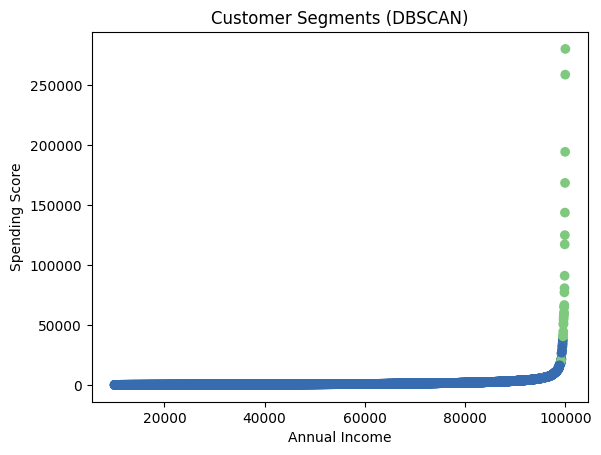

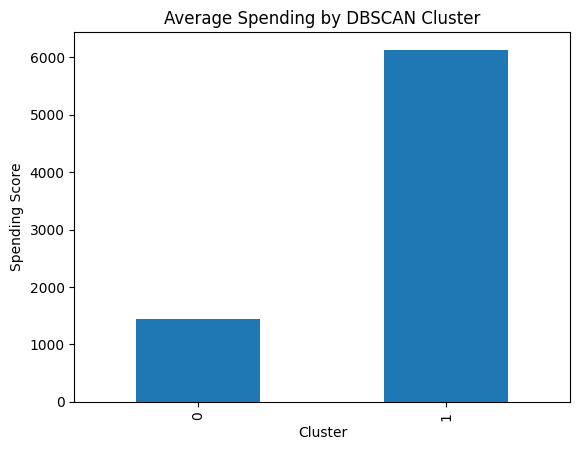

In [ ]:
# Exclude noise for profiling
db_clean = customer[customer['DBSCAN_Cluster'] != -1]

# Cluster sizes
print("DBSCAN Cluster Sizes:")
print(db_clean['DBSCAN_Cluster'].value_counts())
print("\nNoise customers:", (customer['DBSCAN_Cluster'] == -1).sum())

# Mean values per cluster
dbscan_profile = db_clean.groupby("DBSCAN_Cluster")[[
    'Annual Income',
    'Spending Score',
    'Age',
    'Number of Purchases',
    'Time Spent on Website',
    'Recency of Last Purchase'
]].mean().round(2)

display(dbscan_profile)
# Income vs Spending (DBSCAN)
import matplotlib.pyplot as plt

plt.scatter(customer['Annual Income'],
            customer['Spending Score'],
            c=customer['DBSCAN_Cluster'], cmap='Accent')
plt.title("Customer Segments (DBSCAN)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# Spending Comparison Bar Chart
dbscan_profile['Spending Score'].plot(kind='bar')
plt.title("Average Spending by DBSCAN Cluster")
plt.ylabel("Spending Score")
plt.xlabel("Cluster")
plt.show()



# **TASK 05 Report**
# CLUSTER DESCRIPTIONS (DBSCAN)

# Cluster 0 — Core Customers (4,289)

Stable income

Moderate spending

Regular purchases

Medium engagement

# Strategy:

Loyalty programs

Discounts

Recommendation engines

# Cluster 1 — VIP Customers (5)

Very high income

Extremely high spending

Constant engagement

Frequent browsing

# Strategy:

VIP rewards

Priority service

Exclusive offers

Noise Customers (44)

Irregular behavior

Risk or churn-prone users

# Noise Customers (44)

Irregular behavior

Risk or churn-prone users

# Strategy:

Monitoring

Fraud checks

Win-back campaigns

# BUSINESS SUMMARY

Customer segmentation enabled:

Personalized marketing

Customer retention

VIP protection

Fraud detection

Revenue growth

DBSCAN revealed real behavioral patterns that generic marketing would never uncover.

#**VISUALS**

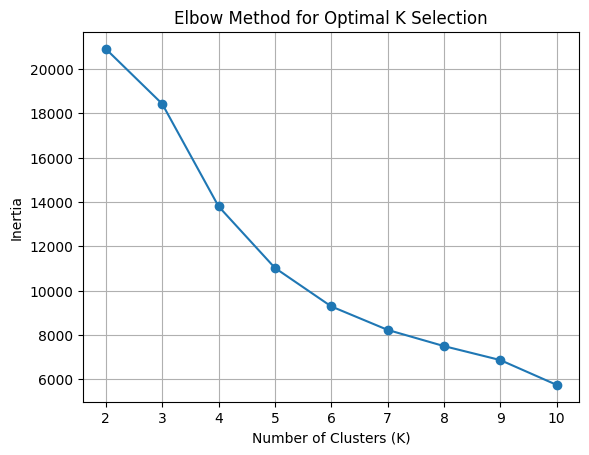

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure()
plt.plot(range(2,11), inertia, marker='o')
plt.title("Elbow Method for Optimal K Selection")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.show()


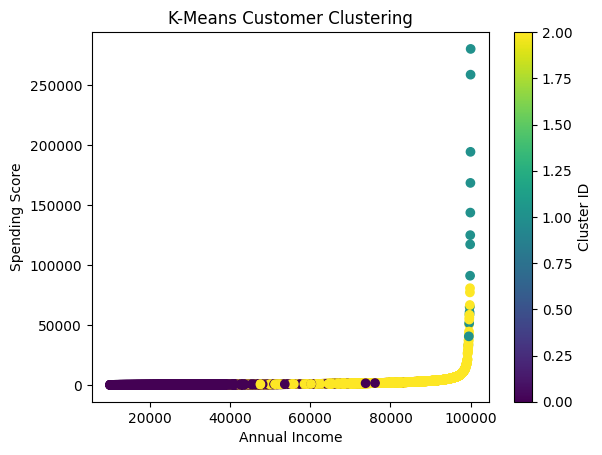

In [ ]:
plt.figure()
plt.scatter(customer['Annual Income'],
            customer['Spending Score'],
            c=customer['KMeans_Cluster'],
            cmap='viridis')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("K-Means Customer Clustering")
plt.colorbar(label="Cluster ID")
plt.show()


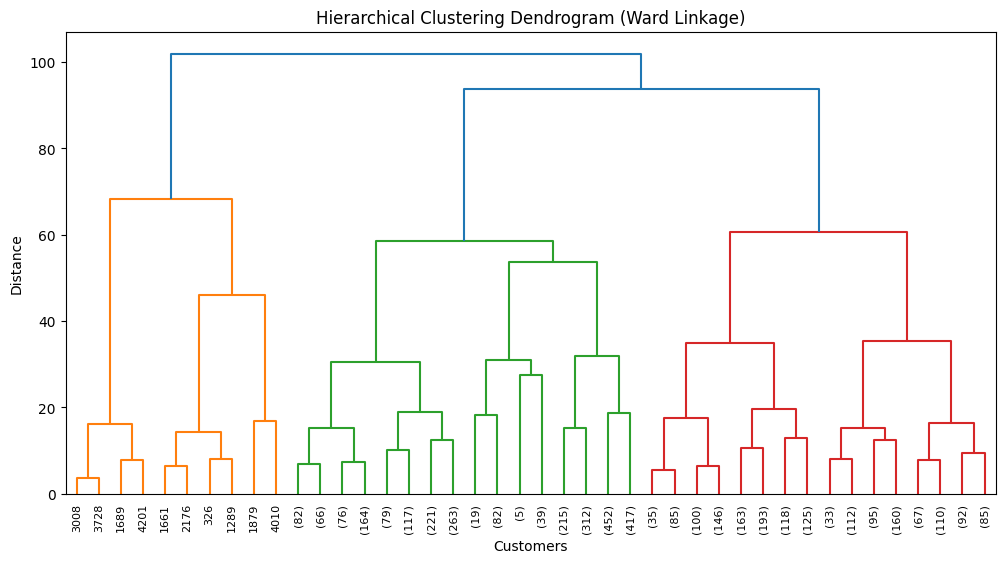

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12,6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


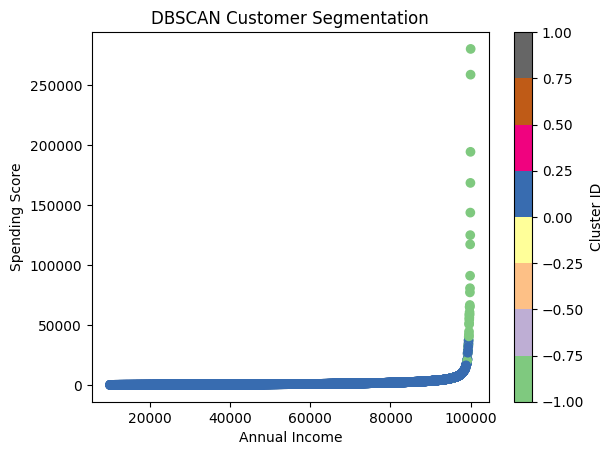

In [ ]:
plt.figure()
plt.scatter(customer['Annual Income'],
            customer['Spending Score'],
            c=customer['DBSCAN_Cluster'],
            cmap='Accent')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("DBSCAN Customer Segmentation")
plt.colorbar(label="Cluster ID")
plt.show()


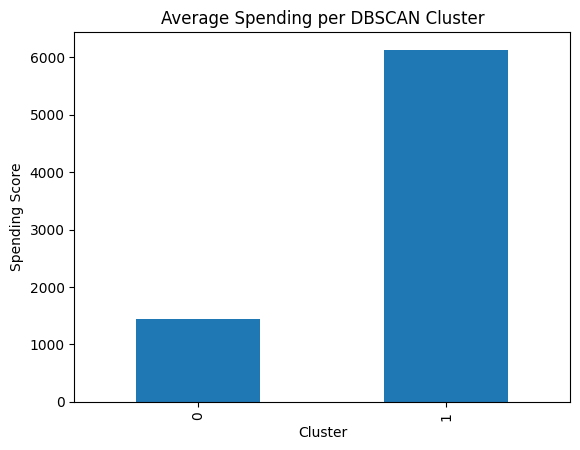

In [ ]:
db_profile = customer[customer['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')['Spending Score'].mean()

plt.figure()
db_profile.plot(kind='bar')
plt.title("Average Spending per DBSCAN Cluster")
plt.xlabel("Cluster")
plt.ylabel("Spending Score")
plt.show()
